In [1]:
import pandas as pd
import ast
import numpy as np

In [2]:
business = pd.read_json('business.json', lines=True)

In [6]:
business.head(30)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."
5,68dUKd8_8liJ7in4aWOSEA,The UPS Store,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd",Mississauga,ON,L5V 0B1,43.599475,-79.711584,2.5,3,1,"{'BusinessParking': '{'garage': False, 'street...","Shipping Centers, Couriers & Delivery Services...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ..."
6,5JucpCfHZltJh5r1JabjDg,Edgeworxx Studio,20 Douglas Woods Drive Southeast,Calgary,AB,T2Z 1K4,50.943646,-114.001828,3.5,7,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Beauty & Spas, Hair Salons",None
7,gbQN7vr_caG_A1ugSmGhWg,Supercuts,"4545 E Tropicana Rd Ste 8, Tropicana",Las Vegas,NV,89121,36.099872,-115.074574,3.5,3,1,"{'RestaurantsPriceRange2': '3', 'GoodForKids':...","Hair Salons, Hair Stylists, Barbers, Men's Hai...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
8,Y6iyemLX_oylRpnr38vgMA,Vita Bella Fine Day Spa,5940 W Union Hills Dr,Glendale,AZ,85308,33.654815,-112.188568,5.0,8,0,"{'RestaurantsPriceRange2': '2', 'ByAppointment...","Nail Salons, Beauty & Spas, Day Spas","{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18..."
9,4GBVPIYRvzGh4K4TkRQ_rw,Options Salon & Spa,21689 Lorain Rd,Fairview Park,OH,44126,41.440825,-81.854097,4.5,8,1,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Beauty & Spas, Nail Salons, Day Spas, Massage","{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0..."


In [4]:
business.shape

(192609, 14)

In [5]:
business.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
business_id     192609 non-null object
name            192609 non-null object
address         192609 non-null object
city            192609 non-null object
state           192609 non-null object
postal_code     192609 non-null object
latitude        192609 non-null float64
longitude       192609 non-null float64
stars           192609 non-null float64
review_count    192609 non-null int64
is_open         192609 non-null int64
attributes      163773 non-null object
categories      192127 non-null object
hours           147779 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [ ]:
business = business[business.is_open == 1]

In [ ]:
business.shape

In [ ]:
mask = ['hours','is_open','review_count']
business = business.drop(mask, axis = 1)

In [ ]:
business

In [ ]:
business_food = business[business['categories'].str.contains('Restaurants|Food',case=False, na=False)]

In [ ]:
business_food

In [ ]:
business_food.info()

In [ ]:
business_food['attributes'].replace('None', np.nan, inplace=True)
business_food = business_food.dropna()
attr = []
for row in business_food['attributes']:
    dictionary = dict(row)
    for item in dictionary.items():
        if item[0] == 'GoodForMeal' or item[0] == 'BusinessParking' or item[0] == 'Ambience' or item[0] == 'Music' or item[0] == 'BestNights'or item[0] == 'DietaryRestrictions':
            if item[1] != 'None':
                d2 = ast.literal_eval(item[1])
                for item2 in d2.items():
                    if item2[0] not in attr:
                        attr.append(item2[0])
                
        elif item[0] not in attr:
            attr.append(item[0])
print(attr)

In [ ]:
# for index, row in business_food.iterrows():
#     if index == 13:
#         print(index, row.attributes)
#         break

In [ ]:
for attribute in attr:
    business_food[attribute] = False
business_food= business_food.drop('HairSpecializesIn', axis =1)
business_food= business_food.astype({'NoiseLevel': 'str', 'RestaurantsPriceRange2': 'int', 'WiFi': 'str', 'Alcohol': 'str', 'RestaurantsAttire': 'str', 'AgesAllowed': 'str'}) 
business_food.info()

In [ ]:
none_PR = []
none_others = []
for index, row in business_food.iterrows():
    dictionary = dict(row['attributes'])
    #print(index, dictionary)
    for item in dictionary.items():
        if item[1] == 'None':
            if item[0] == 'RestaurantsPriceRange2':
                none_PR.append(index)
                business_food.at[index, item[0]] = 3
            else:
                none_others.append(index)
                business_food.at[index, item[0]] = False
        elif item[0] == 'GoodForMeal' or item[0] == 'BusinessParking' or item[0] == 'Ambience' or item[0] == 'Music' or item[0] == 'BestNights' or item[0] == 'DietaryRestrictions':
            d2 = ast.literal_eval(item[1])
            for item2 in d2.items():
                business_food.at[index, item2[0]] = item2[1]
                
        elif item[0] != 'HairSpecializesIn':
            business_food.at[index, item[0]] = item[1]
business_food

In [ ]:
business_food.columns

In [ ]:
business_food= business_food.drop(['Ambience','BusinessParking', 'GoodForMeal', 'Music', 'BestNights','DietaryRestrictions'], axis =1)
business_food.columns

In [67]:

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [ ]:
size = 1000000
review = pd.read_json('review.json', lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)


In [ ]:
chunks = []
for chunk_review in review:
    chunk_review = chunk_review.drop(['review_id','useful','funny','cool'], axis=1)
    # Renaming column name to avoid conflict with business overall star rating
    chunk_review = chunk_review.rename(columns={'stars': 'review_stars'})
    # Inner merge with edited business file so only reviews related to the business remain
    chunk_merged = pd.merge(business_food, chunk_review, on='business_id', how='inner')
    # Show feedback on progress
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunks.append(chunk_merged)
# After trimming down the review file, concatenate all relevant data back to one dataframe
df = pd.concat(chunks, ignore_index=True, join='outer', axis=0)

In [ ]:
csv_name = "yelp_food_reviews.csv"
df.to_csv(csv_name, index=False)

In [2]:
df = pd.read_csv('yelp_food_reviews.csv')


/Users/rowem5/opt/anaconda3/envs/metis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (5,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,28,29,30,31,32,33,34,35,36,37,38,39,41,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import roc_auc_score, roc_curve


iris_dataset = datasets.load_iris()

%matplotlib inline

In [4]:
df.NoiseLevel.replace("u'quiet'", 0, inplace = True)
df.NoiseLevel.replace("'quiet'", 0, inplace = True)
df.NoiseLevel.replace("u'average'", 0, inplace = True)
df.NoiseLevel.replace("'average'", 0, inplace = True)
df.NoiseLevel.replace("u'loud'", 1, inplace = True)
df.NoiseLevel.replace("'loud'", 1, inplace = True)
df.NoiseLevel.replace("u'very_loud'", 1, inplace = True)
df.NoiseLevel.replace("'very_loud'", 1, inplace = True)
df.NoiseLevel.replace('False', 0, inplace = True)
df.NoiseLevel.replace(np.nan, 0, inplace = True)
df.NoiseLevel.unique()

array([1., 0.])

In [5]:

df.WiFi.replace("'free'", 0, inplace = True)
df.WiFi.replace("u'free'", 0, inplace = True)
df.WiFi.replace("'no'", 1, inplace = True)
df.WiFi.replace(np.nan, 1, inplace = True)
df.WiFi.replace("u'no'", 1, inplace = True)
df.WiFi.replace('False', 1, inplace = True)
df.WiFi.replace("u'paid'", 1, inplace = True)
df.WiFi.replace("'paid'", 1, inplace = True)
df.WiFi.unique()

array([1, 0])

In [6]:
df.Alcohol.replace("u'full_bar'", 1, inplace = True)
df.Alcohol.replace("u'beer_and_wine'", 1, inplace = True)
df.Alcohol.replace("u'none'", 0, inplace = True)
df.Alcohol.replace('False', 0, inplace = True)
df.Alcohol.replace("'none'", 0, inplace = True)
df.Alcohol.replace("'beer_and_wine'", 1, inplace = True)
df.Alcohol.replace("'full_bar'", 1, inplace = True)
df.Alcohol.replace(np.nan, 1, inplace = True)
df.Alcohol.unique()

array([1., 0.])

In [7]:

df.RestaurantsAttire.replace("u'casual'", 0, inplace = True)
df.RestaurantsAttire.replace("'casual'", 0, inplace = True)
df.RestaurantsAttire.replace('False', 0, inplace = True)
df.RestaurantsAttire.replace("u'dressy'", 1, inplace = True)
df.RestaurantsAttire.replace("u'formal'", 1, inplace = True)
df.RestaurantsAttire.replace("'dressy'", 1, inplace = True)
df.RestaurantsAttire.replace("'formal'", 1, inplace = True)
df.RestaurantsAttire.replace(np.nan, 0, inplace = True)
df.RestaurantsAttire.unique()

array([0., 1.])

In [8]:
df.AgesAllowed.replace('False', 0, inplace = True)
df.AgesAllowed.replace("u'21plus'", 1, inplace = True)
df.AgesAllowed.replace("u'allages'", 0, inplace = True)
df.AgesAllowed.replace("u'19plus'", 1, inplace = True)
df.AgesAllowed.replace("u'18plus'", 1, inplace = True)
df.AgesAllowed.replace(np.nan, 0, inplace = True)
df.AgesAllowed.unique()

array([False, 1], dtype=object)

In [9]:
df.RestaurantsPriceRange2.replace(1, 0, inplace = True)
df.RestaurantsPriceRange2.replace(2, 0, inplace = True)
df.RestaurantsPriceRange2.replace(3, 1, inplace = True)
df.RestaurantsPriceRange2.replace(4, 1, inplace = True)
df.RestaurantsPriceRange2.replace(5, 1, inplace = True)
df.RestaurantsPriceRange2.replace(np.nan, 0, inplace = True)
df.RestaurantsPriceRange2.unique()

array([0., 1.])

In [10]:
df.replace('True', 1, inplace = True)
df.replace('False', 0, inplace = True)
df.dropna()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,attributes,...,kosher,halal,soy-free,vegetarian,Open24Hours,RestaurantsCounterService,user_id,review_stars,text,date
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...",...,False,False,False,False,False,False,2K62MJ4CJ19L8Tp5pRfjfQ,3.0,My girlfriend and I went for dinner at Emerald...,2017-01-27 21:54:30
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...",...,False,False,False,False,False,False,A0kENtCCoVT3m7T35zb2Vg,3.0,We've always been there on a Sunday so we were...,2013-06-24 23:11:30
2,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...",...,False,False,False,False,False,False,SuOLY03LW5ZcnynKhbTydA,3.0,"***No automatic doors, not baby friendly!*** I...",2016-01-04 12:59:22
3,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...",...,False,False,False,False,False,False,lymyUak6KNcNKoDbK87MiQ,1.0,"Horrible service,\nI went there tonight with m...",2014-05-09 02:38:43
4,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,"{'RestaurantsReservations': 'True', 'GoodForMe...",...,False,False,False,False,False,False,6vU0I5XgCv9OQHZ76rV6qw,4.0,One of the gauges of a good Chinese restaurant...,2011-03-21 14:39:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875005,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,"{'OutdoorSeating': 'True', 'BikeParking': 'Tru...",...,False,False,False,False,False,False,ZO8h27XOn_XFKLLRRrLp0g,5.0,When I write a review on someplace that I have...,2013-05-03 18:57:28
3875006,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,"{'OutdoorSeating': 'True', 'BikeParking': 'Tru...",...,False,False,False,False,False,False,mwual7bROpwhZ3fu_GiPtQ,5.0,We stopped in at Tre Belle on a Tuesday evenin...,2013-12-04 01:16:42
3875007,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,"{'OutdoorSeating': 'True', 'BikeParking': 'Tru...",...,False,False,False,False,False,False,WKneD6tKr18q0ey0QbHBaA,3.0,I wasnt impressed. The place is beautiful and ...,2012-04-25 16:51:38
3875008,p1eUTUB_5hf1enoKYBV3DA,Ken Stewart's Tre Belle,1911 N Cleveland-Massillon Rd,Bath,OH,44210,41.187547,-81.635791,3.5,"{'OutdoorSeating': 'True', 'BikeParking': 'Tru...",...,False,False,False,False,False,False,PxB2oZXO9N_4Zo2VIPUuGA,1.0,Last night some friends and I dined at this es...,2018-02-22 22:32:44


In [11]:
df.replace(True, 1, inplace = True)
df.replace(False, 0, inplace = True)

In [12]:
sample1 = df.sample(n = 500000, random_state = 33)
sample2 = df.sample(n = 500000, random_state = 20)
sample1.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,attributes,...,kosher,halal,soy-free,vegetarian,Open24Hours,RestaurantsCounterService,user_id,review_stars,text,date
422884,XaVHqVByyKswE0wV-B0HRg,El Rio Grande,524 W Main St,Stoughton,WI,53589,42.917215,-89.226970,4.0,"{'Caters': 'True', 'RestaurantsGoodForGroups':...",...,0.0,0.0,0.0,0.0,0.0,0.0,Y3Pn982mcsLMGtPi5Kgigw,5.0,This is my absolute favorite restaurant! The f...,2012-01-07 04:36:15
910541,WnRqXZN_tR058EufqS1kAw,TYC - The Yellow Chilli - By Sanjeev Kapoor,55 Eglinton Avenue E,Toronto,ON,M4P 1G8,43.706842,-79.395979,3.0,"{'WheelchairAccessible': 'False', 'OutdoorSeat...",...,0.0,0.0,0.0,0.0,0.0,0.0,VShfVnyOQxVkfDIC7NEA6Q,2.0,I have been passing the restaurant and always ...,2018-03-10 02:21:50
3130504,IOEGLxXwCNiq4P-U359D7Q,Those Guys Pies,2916 Lake E Dr,Las Vegas,NV,89117,36.138515,-115.284355,4.0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...",...,0.0,0.0,0.0,0.0,0.0,0.0,4kBDBcr6sPe2sPkK7ibgtw,4.0,"The pizza is not bad, and their cheesesteak ta...",2016-08-03 21:35:37
2286549,g6aWPjcKukfK1-Po70Lhyw,Wonder Bar Steakhouse,222 E Olin Ave,Madison,WI,53713,43.052197,-89.379713,4.0,"{'RestaurantsTakeOut': 'False', 'HasTV': 'True...",...,0.0,0.0,0.0,0.0,0.0,0.0,ES1DnYrfVNynOqU4EpAKrw,4.0,My parents took me to this place 50+ years ago...,2011-12-23 15:51:45
1507854,6mI2kt70hiOb0UaNYXfS8w,Ambiyan,149 Main Street,Unionville,ON,L3R 2G8,43.866330,-79.311104,3.5,"{'Alcohol': ""u'full_bar'"", 'WiFi': ""u'free'"", ...",...,0.0,0.0,0.0,0.0,0.0,0.0,t_m1a0KzG960Vh5wgHo9YQ,3.0,Yes Im brown so I know my Indian food. This p...,2016-07-02 17:14:37


In [37]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [14]:
y = sample1.iloc[:, 85]
X = sample1.iloc[:, 11:84]


X_train, X_test, label_train, label_test = train_test_split(X, y, test_size=0.3, random_state=4444)


In [15]:
def f1(precision, recall):
    return 2 * (precision * recall/ (precision + recall))

In [16]:
def multiclass_roc_auc_score(y_test, y_pred, average="weighted"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [17]:
rfc = RandomForestClassifier(n_estimators = 1000, n_jobs=-1)
rfc.fit(X_train, label_train)
rfc_predict = rfc.predict(X_test)
rfc_score= accuracy_score(label_test, rfc_predict)
print("Training: {:6.2f}%".format(100*rfc.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*rfc.score(X_test, label_test)))
print("Random Forest accuracy Score: " + str(rfc_score))
p_score = precision_score(label_test, rfc_predict, average = 'weighted')
r_score = recall_score(label_test, rfc_predict, average = 'weighted')
print("Precision: {:6.4f},   Recall: {:6.4f}".format(p_score, r_score))
print("F1: {:6.2f}".format(f1(p_score, r_score)))

Training:  46.16%
Test set:  41.82%
Random Forest accuracy Score: 0.41817333333333334
Precision: 0.3493,   Recall: 0.4182
F1:   0.38


In [18]:
feature_imp = []
for feature in zip(X_train.columns, rfc.feature_importances_):
    print(feature)
    feature_imp.append(feature)

('RestaurantsReservations', 0.00989495790963802)
('dessert', 0.023493752713737395)
('latenight', 0.02480744629314932)
('lunch', 0.03833208185279896)
('dinner', 0.03281619431256336)
('brunch', 0.028796708280703867)
('breakfast', 0.02495211305275331)
('garage', 0.0234491803339332)
('street', 0.03233051330346111)
('validated', 0.005066636090346107)
('lot', 0.03718286368523412)
('valet', 0.013352055375182205)
('Caters', 0.030585567855338527)
('NoiseLevel', 0.023562468873261962)
('RestaurantsTableService', 0.03608513536070268)
('RestaurantsTakeOut', 0.008767318868096641)
('RestaurantsPriceRange2', 0.017237201885979665)
('OutdoorSeating', 0.012216601046244833)
('BikeParking', 0.018837108726780145)
('romantic', 0.006289634071159269)
('intimate', 0.007445286342933494)
('classy', 0.009551063017187075)
('hipster', 0.012103852770263317)
('divey', 0.008529908498731325)
('touristy', 0.005754824040260068)
('trendy', 0.020505304355070742)
('upscale', 0.005135519271502621)
('casual', 0.033839356166423

In [19]:
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X_train.columns), 
             reverse=True))

[(0.0604, 'WiFi'), (0.0407, 'BusinessAcceptsCreditCards'), (0.0383, 'lunch'), (0.0372, 'lot'), (0.0361, 'RestaurantsTableService'), (0.0352, 'WheelchairAccessible'), (0.0338, 'casual'), (0.0328, 'dinner'), (0.0323, 'street'), (0.0306, 'Caters'), (0.0288, 'brunch'), (0.0287, 'Alcohol'), (0.0267, 'DriveThru'), (0.025, 'breakfast'), (0.0248, 'latenight'), (0.0236, 'NoiseLevel'), (0.0235, 'dessert'), (0.0234, 'garage'), (0.0228, 'DogsAllowed'), (0.0228, 'BusinessAcceptsBitcoin'), (0.0205, 'trendy'), (0.0188, 'BikeParking'), (0.0172, 'RestaurantsPriceRange2'), (0.0157, 'HappyHour'), (0.0156, 'ByAppointmentOnly'), (0.0153, 'GoodForDancing'), (0.0145, 'RestaurantsDelivery'), (0.0134, 'valet'), (0.0122, 'OutdoorSeating'), (0.0121, 'hipster'), (0.0121, 'BYOBCorkage'), (0.0107, 'GoodForKids'), (0.0106, 'Smoking'), (0.0099, 'RestaurantsReservations'), (0.0099, 'HasTV'), (0.0099, 'CoatCheck'), (0.0098, 'saturday'), (0.0097, 'friday'), (0.0096, 'classy'), (0.0088, 'RestaurantsTakeOut'), (0.0085, 'd

In [20]:
sfm = SelectFromModel(rfc, threshold=0.005)

# Train the selector
sfm.fit(X_train, label_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
   

In [21]:
for feature_list_index in sfm.get_support(indices=True):
    print(X_train.columns[feature_list_index])

RestaurantsReservations
dessert
latenight
lunch
dinner
brunch
breakfast
garage
street
validated
lot
valet
Caters
NoiseLevel
RestaurantsTableService
RestaurantsTakeOut
RestaurantsPriceRange2
OutdoorSeating
BikeParking
romantic
intimate
classy
hipster
divey
touristy
trendy
upscale
casual
HasTV
WiFi
GoodForKids
Alcohol
RestaurantsAttire
RestaurantsGoodForGroups
RestaurantsDelivery
BusinessAcceptsCreditCards
DriveThru
HappyHour
CoatCheck
Smoking
background_music
live
friday
wednesday
thursday
sunday
saturday
WheelchairAccessible
BusinessAcceptsBitcoin
GoodForDancing
ByAppointmentOnly
DogsAllowed
BYOBCorkage
Corkage


In [22]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [23]:
clf_important = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
clf_important.fit(X_important_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
y_pred = rfc.predict(X_test)
accuracy_score(label_test, y_pred)

0.41817333333333334

In [25]:
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(label_test, y_important_pred)


0.4183

In [45]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(label_test, rfc.predict(X_test))
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=[1, 2, 3, 4, 5],
           yticklabels=[1, 2, 3, 4, 5]);
    plt.xlabel('predicted stars')
    plt.ylabel('actual stars')

In [98]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(rfc, threshold), threshold=(0.0,1.0,0.02))


interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [44]:
print("kNN confusion matrix: \n\n", confusion_matrix(label_test, rfc.predict(X_test)))

kNN confusion matrix: 

 [[ 2876   382   690  2978 10616]
 [ 1257   291   607  2827  8344]
 [ 1261   328   918  4645 12085]
 [ 1652   450  1259  8467 26793]
 [ 1848   425   970  7857 50174]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103ecb9b90>]],
      dtype=object)

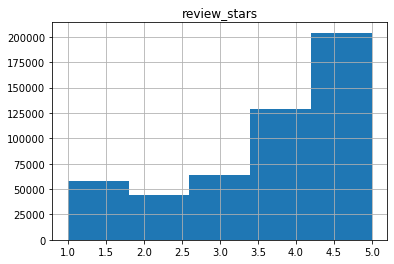

In [49]:
sample1.hist(column = 'review_stars', bins = 5)


In [ ]:
print("ROC AUC score = ", roc_auc_score(label_test, log.predict_proba(X_test)[:,1]))

In [27]:
log = LogisticRegression(C = 0.95, solver = 'liblinear' )
log.fit(X_train, label_train)
print("The score for Logistic Regression is")
print("Training: {:6.2f}%".format(100*log.score(X_train, label_train)))
print("Test set: {:6.2f}%".format(100*log.score(X_test, label_test)))
y_predict = log.predict(X_test)
print("Default threshold:")
p_score = precision_score(label_test, y_predict, average = 'weighted')
r_score = recall_score(label_test, y_predict, average = 'weighted')
print("Precision: {:6.4f},   Recall: {:6.4f}".format(p_score, r_score))
print("F1: {:6.2f}".format(f1(p_score, r_score)))

/Users/rowem5/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The score for Logistic Regression is
Training:  41.41%
Test set:  41.35%
Default threshold:
Precision: 0.2948,   Recall: 0.4135
F1:   0.34


/Users/rowem5/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [58]:
tableau = []
for item in log.coef_:
    tableau.append(item)
tableau.append(X_train.columns)
tableau

[array([ 0.17987243,  0.1706602 ,  0.21353996, -0.11821072, -0.2229793 ,
        -0.21956802,  0.05830329, -0.06409046, -0.49907135, -0.19606583,
        -0.15447887,  0.01235096, -0.02310274,  0.32985395, -0.0472015 ,
        -0.06310066, -0.31498736, -0.01653541, -0.12839568, -0.16109385,
        -0.48119277, -0.40467003, -0.39834292, -0.08548872, -0.01059789,
        -0.38123   , -0.22054451, -0.32085605,  0.10716349, -0.0425632 ,
         0.22645944, -0.04055529, -0.15029458,  0.03015858, -0.03009384,
         0.35085239,  0.17632171,  0.15502261,  0.09575281,  0.02491946,
         0.16177938, -0.08802973, -0.10320467, -0.03595336,  0.23350358,
        -0.09264656, -0.19416486,  0.17558363,  0.01322108,  0.01502227,
         0.06860284,  0.00835579, -0.08606162, -0.25354051, -0.27711941,
        -0.15883594, -0.315098  , -0.03325359,  0.        , -0.29206699,
         0.04435798,  0.55181255,  0.6948486 ,  0.65177215, -0.07181018,
        -0.05718155, -0.21987154,  0.        ,  0. 

In [59]:
tb = pd.DataFrame(tableau)

In [61]:
tb.columns = X_train.columns

In [68]:

tb

,RestaurantsReservations,dessert,latenight,lunch,dinner,brunch,breakfast,garage,street,validated,lot,valet,Caters,NoiseLevel,RestaurantsTableService,RestaurantsTakeOut,RestaurantsPriceRange2,OutdoorSeating,BikeParking,romantic,intimate,classy,hipster,divey,touristy,trendy,upscale,casual,HasTV,WiFi,GoodForKids,Alcohol,RestaurantsAttire,RestaurantsGoodForGroups,RestaurantsDelivery,BusinessAcceptsCreditCards,DriveThru,HappyHour,CoatCheck,Smoking,dj,background_music,jukebox,live,video,karaoke,monday,tuesday,friday,wednesday,thursday,sunday,saturday,WheelchairAccessible,BusinessAcceptsBitcoin,GoodForDancing,ByAppointmentOnly,DogsAllowed,no_music,BYOBCorkage,Corkage,BYOB,AgesAllowed,AcceptsInsurance,dairy-free,gluten-free,vegan,kosher,halal,soy-free,vegetarian,Open24Hours,RestaurantsCounterService
0,0.179872,0.17066,0.21354,-0.118211,-0.222979,-0.219568,0.0583033,-0.0640905,-0.499071,-0.196066,-0.154479,0.012351,-0.0231027,0.329854,-0.0472015,-0.0631007,-0.314987,-0.0165354,-0.128396,-0.161094,-0.481193,-0.40467,-0.398343,-0.0854887,-0.0105979,-0.38123,-0.220545,-0.320856,0.107163,-0.0425632,0.226459,-0.0405553,-0.150295,0.0301586,-0.0300938,0.350852,0.176322,0.155023,0.0957528,0.0249195,0.161779,-0.0880297,-0.103205,-0.0359534,0.233504,-0.0926466,-0.194165,0.175584,0.0132211,0.0150223,0.0686028,0.00835579,-0.0860616,-0.253541,-0.277119,-0.158836,-0.315098,-0.0332536,0,-0.292067,0.044358,0.551813,0.694849,0.651772,-0.0718102,-0.0571815,-0.219872,0,0,-0.0718102,0.634703,-0.417518,-0.368287
1,-0.111018,0.0556786,-0.0360773,-0.0326487,-0.0127467,-0.0443432,0.0440885,0.13008,-0.185528,0.00460887,-0.0777296,-0.0246194,-0.0106298,0.190531,-0.0199091,-0.0171477,-0.0311244,0.038229,-0.0226549,-0.177554,-0.364651,-0.173264,-0.249562,-0.245715,0.132309,-0.171846,-0.124124,-0.0965606,0.100422,-0.0660062,0.143582,0.160053,-0.0161439,0.0111329,0.0374325,-0.0901725,0.0977311,0.103684,0.0971631,0.0245408,0.160975,-0.0366429,-0.0714542,-0.0272734,-0.0705074,-0.418551,-0.207912,0.135188,-0.0273436,-0.120248,-0.0353357,-0.0405547,-0.0223331,-0.163189,-0.14909,-0.0242105,-0.121441,-0.0262881,0,0.00236718,0.0130131,-0.00582993,0.00485513,-0.454751,-0.0237767,0.398889,-0.884587,0,0,-0.0237767,0.545374,-0.365661,0.142429
2,-0.0223289,-0.0468236,0.0638525,-0.0046289,0.0090534,0.0193296,0.00420314,0.204726,-0.0801755,0.0414364,-0.0481776,0.031118,0.050748,0.171332,-0.0369846,-0.0163495,-0.050305,0.107913,0.0256674,-0.143469,-0.176139,-0.0720347,-0.108798,-0.156664,0.0984732,-0.101533,-0.149471,0.00304175,-0.0433465,-0.00706639,0.149766,0.159002,-0.054457,-0.0990565,-0.028625,-0.425517,0.0632976,0.0997978,0.0479769,-0.0639479,0.0414447,0.0185357,0.0211984,-0.0221319,-0.140555,-0.0975334,-0.114145,-0.0115138,-0.0574675,-0.0101696,0.00563252,-0.000145997,0.0328588,-0.0899965,-0.115098,-0.0285616,-0.111677,-0.0235541,0,0.036894,0.0415767,-0.163433,0.149803,0.294989,-0.0217572,-0.249126,-0.142435,0,0,-0.0217572,0.250114,0.321197,0.195696
3,-0.0217629,-0.158237,0.0152143,0.0250752,0.0401278,-0.000656204,0.0379801,0.14978,0.164461,0.00547283,0.0446947,0.0448061,0.0458186,-0.0109097,-0.043753,0.0284312,-0.00701007,0.0163897,0.0644982,-0.0409849,-0.0926069,-0.0369572,0.029309,0.0764383,-0.0434919,0.0179037,-0.0453141,0.0671845,0.00992061,0.038942,0.0851739,0.120067,-0.0991161,-0.0480407,-0.0946621,-0.398343,-0.0536048,0.0045469,-0.063202,-0.0538824,-0.0965526,0.0209961,0.0473288,0.0409979,-0.300031,0.0289867,0.0138341,-0.105918,0.0102081,0.061551,0.0416274,-0.0241316,0.0580301,-0.0899678,-0.0337115,0.0222184,0.124088,-0.0207589,0,0.159022,0.0229924,-0.18456,0.0842867,-0.601771,0.569486,0.110351,-0.428437,0,0,0.569486,-0.089197,0.528467,-0.0102183
4,-0.0237372,0.0486738,-0.122284,0.0500484,0.087078,0.0972095,-0.0600098,-0.240101,0.163687,0.0400595,0.0892427,-0.02064,-0.030162,-0.3412,0.0855934,-0.00776222,0.193759,-0.0612576,0.0410595,0.194322,0.38593,0.242147,0.200769,0.126552,-0.120587,0.228457,0.215217,0.135641,-0.0747469,0.0122517,-0.319498,-0.201139,0.170223,0.

In [97]:
csv_name = "proj3_tb3.csv"
tb.to_csv(csv_name, index=False)

In [72]:

tb = tb.T
tb = tb.drop(['mean'])

,0,1,2,3,4,mean
RestaurantsReservations,0.179872,-0.111018,-0.0223289,-0.0217629,-0.0237372,0.000205053
dessert,0.17066,0.0556786,-0.0468236,-0.158237,0.0486738,0.0139903
latenight,0.21354,-0.0360773,0.0638525,0.0152143,-0.122284,0.0268491
lunch,-0.118211,-0.0326487,-0.0046289,0.0250752,0.0500484,-0.016073
dinner,-0.222979,-0.0127467,0.0090534,0.0401278,0.087078,-0.0198934
...,...,...,...,...,...,...
halal,0,0,0,0,0,0
soy-free,-0.0718102,-0.0237767,-0.0217572,0.569486,-0.0669118,0.077046
vegetarian,0.634703,0.545374,0.250114,-0.089197,-0.462619,0.175675
Open24Hours,-0.417518,-0.365661,0.321197,0.528467,-0.420285,-0.07076


In [95]:

tb = tb.T

In [96]:
tb

,1,2,3,4,5
RestaurantsReservations,0.179872,-0.111018,-0.0223289,-0.0217629,-0.0237372
dessert,0.17066,0.0556786,-0.0468236,-0.158237,0.0486738
latenight,0.21354,-0.0360773,0.0638525,0.0152143,-0.122284
lunch,-0.118211,-0.0326487,-0.0046289,0.0250752,0.0500484
dinner,-0.222979,-0.0127467,0.0090534,0.0401278,0.087078
...,...,...,...,...,...
halal,0,0,0,0,0
soy-free,-0.0718102,-0.0237767,-0.0217572,0.569486,-0.0669118
vegetarian,0.634703,0.545374,0.250114,-0.089197,-0.462619
Open24Hours,-0.417518,-0.365661,0.321197,0.528467,-0.420285


In [85]:
tb2a = []
tb2b = []
for tup in feature_imp:
    tb2a.append(tup[0])
    tb2b.append(tup[1])
    

In [88]:
tb2 = (tb2a, tb2b)
tb2

(['RestaurantsReservations',
  'dessert',
  'latenight',
  'lunch',
  'dinner',
  'brunch',
  'breakfast',
  'garage',
  'street',
  'validated',
  'lot',
  'valet',
  'Caters',
  'NoiseLevel',
  'RestaurantsTableService',
  'RestaurantsTakeOut',
  'RestaurantsPriceRange2',
  'OutdoorSeating',
  'BikeParking',
  'romantic',
  'intimate',
  'classy',
  'hipster',
  'divey',
  'touristy',
  'trendy',
  'upscale',
  'casual',
  'HasTV',
  'WiFi',
  'GoodForKids',
  'Alcohol',
  'RestaurantsAttire',
  'RestaurantsGoodForGroups',
  'RestaurantsDelivery',
  'BusinessAcceptsCreditCards',
  'DriveThru',
  'HappyHour',
  'CoatCheck',
  'Smoking',
  'dj',
  'background_music',
  'jukebox',
  'live',
  'video',
  'karaoke',
  'monday',
  'tuesday',
  'friday',
  'wednesday',
  'thursday',
  'sunday',
  'saturday',
  'WheelchairAccessible',
  'BusinessAcceptsBitcoin',
  'GoodForDancing',
  'ByAppointmentOnly',
  'DogsAllowed',
  'no_music',
  'BYOBCorkage',
  'Corkage',
  'BYOB',
  'AgesAllowed',


In [92]:


tb2 = tb2.T
tb2

,RestaurantsReservations,dessert,latenight,lunch,dinner,brunch,breakfast,garage,street,validated,lot,valet,Caters,NoiseLevel,RestaurantsTableService,RestaurantsTakeOut,RestaurantsPriceRange2,OutdoorSeating,BikeParking,romantic,intimate,classy,hipster,divey,touristy,trendy,upscale,casual,HasTV,WiFi,GoodForKids,Alcohol,RestaurantsAttire,RestaurantsGoodForGroups,RestaurantsDelivery,BusinessAcceptsCreditCards,DriveThru,HappyHour,CoatCheck,Smoking,dj,background_music,jukebox,live,video,karaoke,monday,tuesday,friday,wednesday,thursday,sunday,saturday,WheelchairAccessible,BusinessAcceptsBitcoin,GoodForDancing,ByAppointmentOnly,DogsAllowed,no_music,BYOBCorkage,Corkage,BYOB,AgesAllowed,AcceptsInsurance,dairy-free,gluten-free,vegan,kosher,halal,soy-free,vegetarian,Open24Hours,RestaurantsCounterService
1,0.00989496,0.0234938,0.0248074,0.0383321,0.0328162,0.0287967,0.0249521,0.0234492,0.0323305,0.00506664,0.0371829,0.0133521,0.0305856,0.0235625,0.0360851,0.00876732,0.0172372,0.0122166,0.0188371,0.00628963,0.00744529,0.00955106,0.0121039,0.00852991,0.00575482,0.0205053,0.00513552,0.0338394,0.00987108,0.0603804,0.0106922,0.0286969,0.00816628,0.0077861,0.014494,0.0407408,0.026676,0.0156826,0.00989747,0.0106138,0.0031457,0.00751396,0.00312978,0.00543648,0.000176825,0.00101162,0.00420945,0.00494045,0.0096889,0.00570183,0.00797671,0.00667828,0.00975542,0.0352418,0.0228388,0.0153082,0.0155751,0.022802,0,0.0120896,0.00678177,0.00180142,0.000841499,0.00083488,5.5676e-06,0.000441917,0.000568505,0,0,6.75454e-06,0.000263344,0.000250688,0.000364551


In [93]:
csv_name = "proj3_tb2.csv"
tb2.to_csv(csv_name, index=False)